CB.EN.U4CSE19135 - NDN JAHNAVI                                                     
CB.EN.U4CSE19148 - SITHARA J P

In [107]:
import pandas as pd
import numpy as np 
% matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas.util.testing as tm
from statsmodels.tsa.arima_model import ARIMA

In [108]:
df = pd.read_csv('/content/AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


**PRE PROCESSING OF DATA**

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [110]:
#Removed 2 unamed attributes in the dataset 
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [111]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [112]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df = df.dropna()
df.shape

(9357, 15)

In [114]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.874746,-159.090093,1.865683,894.476969,168.605536,794.871754,58.135834,1391.361975,974.953618,9.776852,39.483873,-6.837604
std,77.657170,329.818519,139.789093,41.380206,342.316710,257.427995,321.977764,126.931715,467.195781,456.926877,43.203377,51.215786,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1052.000000,-200.000000,7.900000,894.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [115]:
df = df.replace(-200, np.nan)

In [116]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356],
           dtype='int64', length=9357)

In [117]:
df.loc[:,'Datetime'] = df['Date'] + ' ' + df['Time']

In [118]:
df = df.replace(-200, np.nan)

In [119]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
Date,,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3/10/2004 18:00:00
2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3/10/2004 19:00:00
2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,3/10/2004 20:00:00
2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3/10/2004 21:00:00
2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3/10/2004 22:00:00


In [120]:
df = df.dropna()

In [121]:
S1 = df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].mean())
S2 = df['PT08.S2(NMHC)'].fillna(df['PT08.S1(CO)'].mean())
S3 = df['PT08.S3(NOx)'].fillna(df['PT08.S1(CO)'].mean())
S4 = df['PT08.S4(NO2)'].fillna(df['PT08.S1(CO)'].mean())
S5 = df['PT08.S5(O3)'].fillna(df['PT08.S1(CO)'].mean())

In [122]:
df1 = pd.DataFrame({'S1':S1, 'S2':S1, 'S3':S3, 'S4':S4, 'S5':S5})
df1.to_csv("AirQuality_1.csv")

**Visualisation and EDA**

Text(0.5, 1.0, 'PT08.S5(O3)')

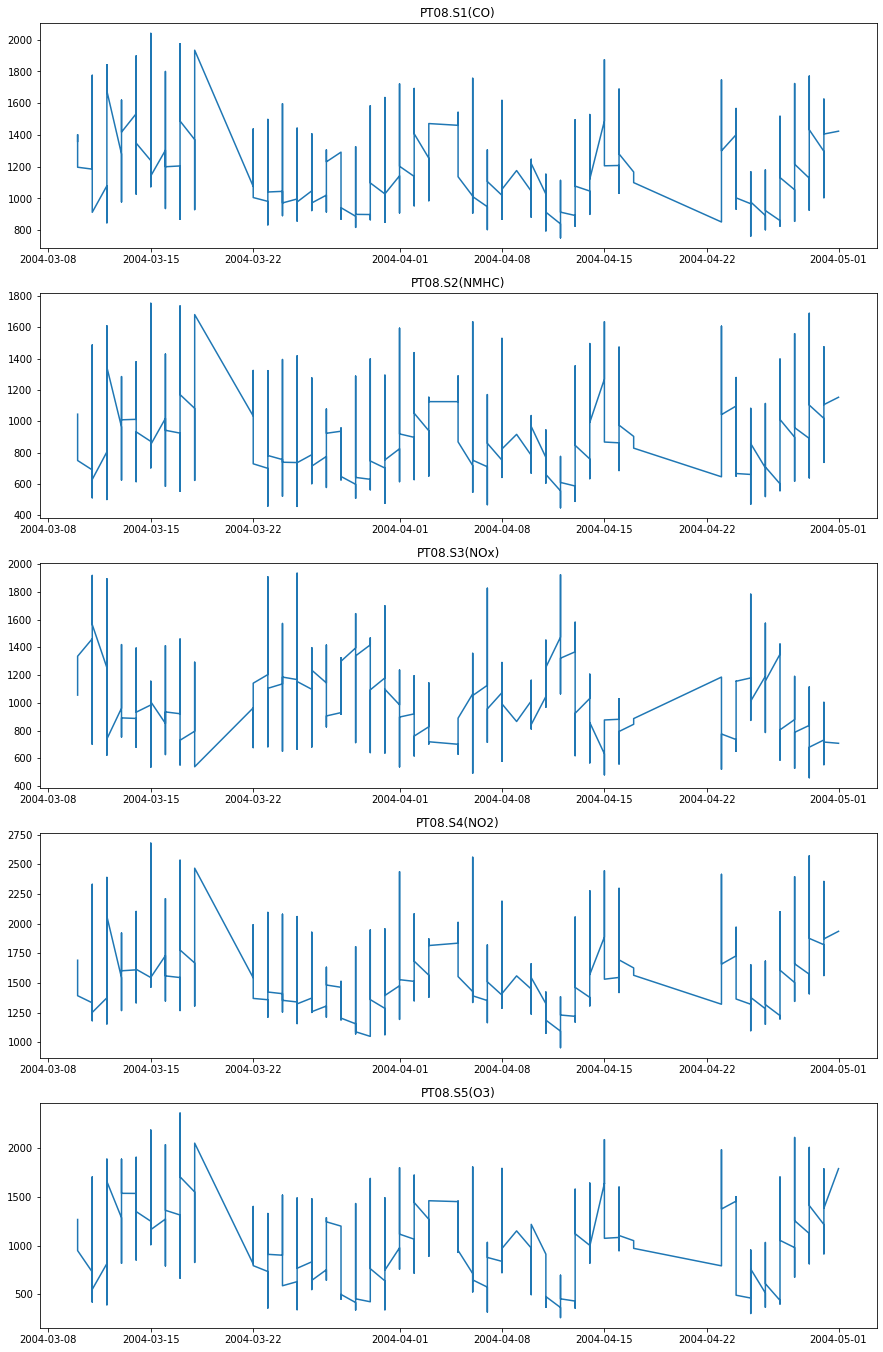

In [123]:
fig, axes = plt.subplots(5,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('PT08.S1(CO)')
axes[1].plot(S2)
axes[1].set_title ('PT08.S2(NMHC)')
axes[2].plot(S3)
axes[2].set_title ('PT08.S3(NOx)')
axes[3].plot(S4)
axes[3].set_title ('PT08.S4(NO2)')
axes[4].plot(S5)
axes[4].set_title ('PT08.S5(O3)')

Text(0.5, 0, 'Date')

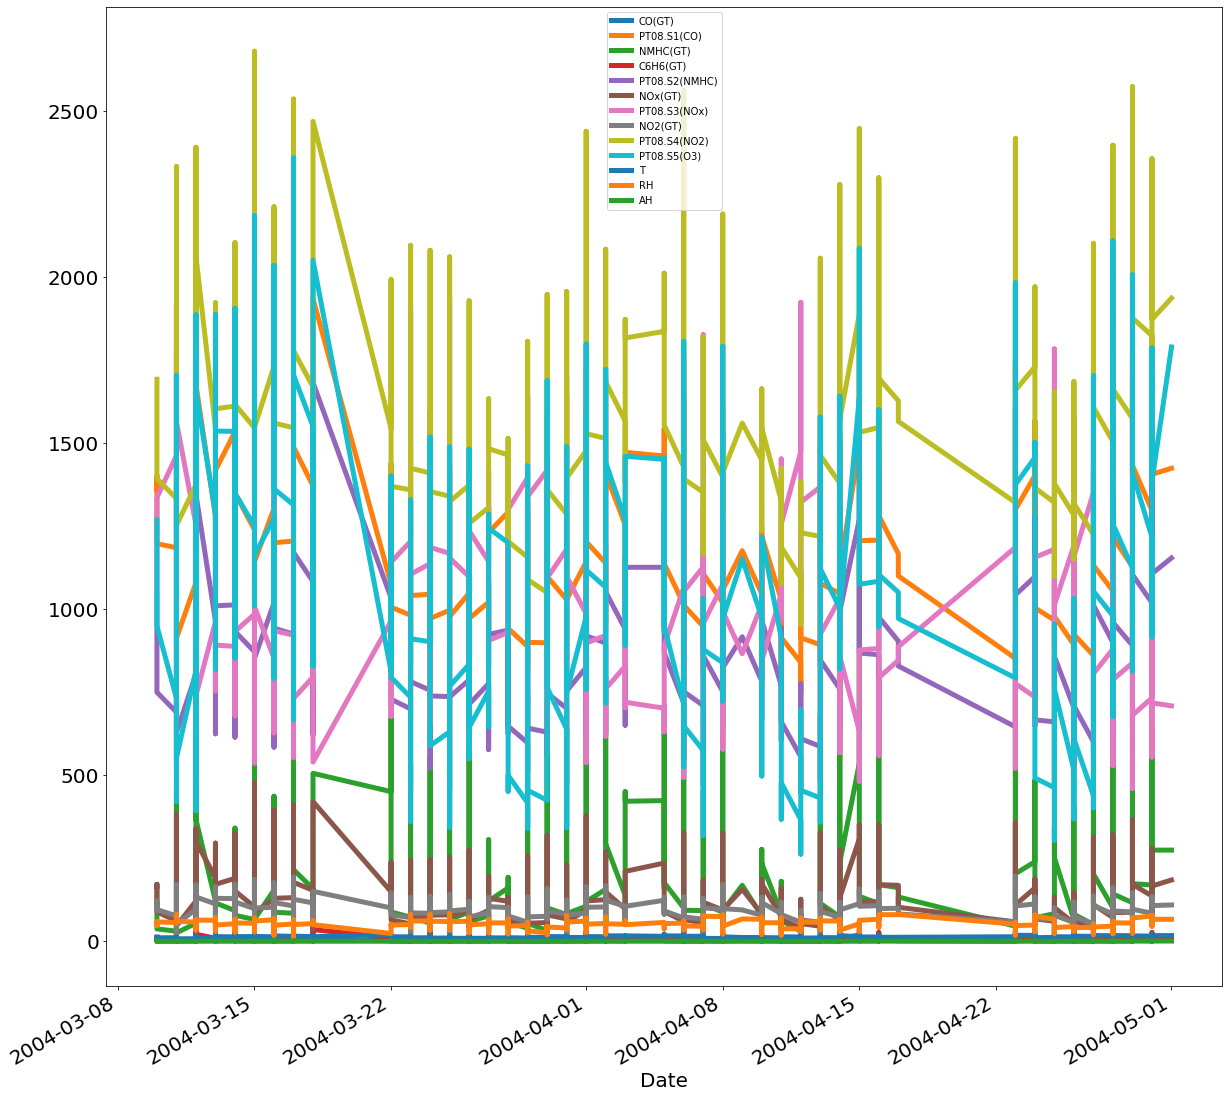

In [124]:
df.plot(figsize=(20, 20), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20)

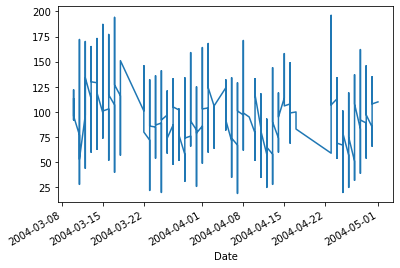

In [125]:
#plot of NO2
df2 = df['NO2(GT)']
df2.plot();

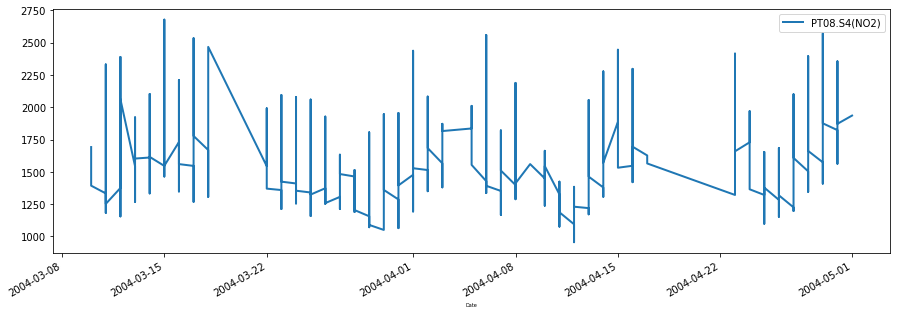

In [126]:
# plotting graph between attributes date and gas named PT08.S4(NO2)
#PT08.S4(NO2) is high in air during the year of 2004 and from november it is gradually decreased

df[['PT08.S4(NO2)']].plot(figsize=(15,5), linewidth=2, fontsize=10)
plt.xlabel('Date', fontsize=5);

In [127]:
y  = df['C6H6(GT)']
type(y)

pandas.core.series.Series

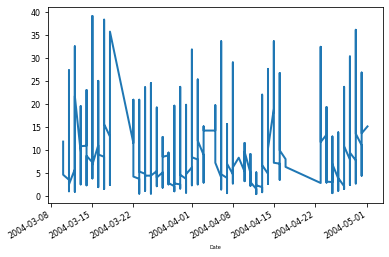

In [128]:
y = df['C6H6(GT)']
y.rolling(1).median().plot( linewidth=2, fontsize=8)
plt.xlabel('Date', fontsize=5);
# During 2005 Feb No2 gas recorded highest in air
#




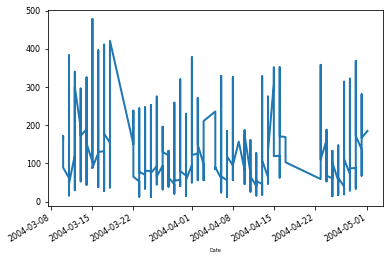

In [129]:
y = df['NOx(GT)']
y.rolling(1).median().plot( linewidth=2, fontsize=8)
plt.xlabel('Date', fontsize=5);

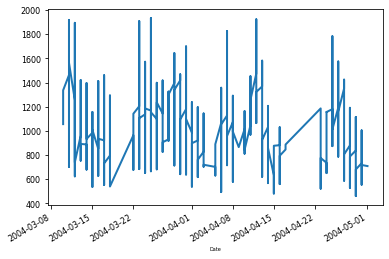

In [130]:
y = df['PT08.S3(NOx)']
y.rolling(1).median().plot( linewidth=2, fontsize=8)
plt.xlabel('Date', fontsize=5);

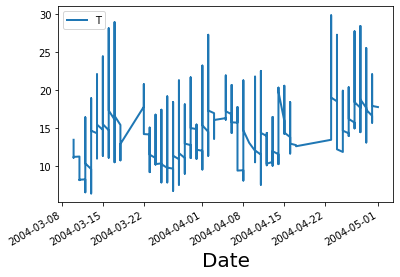

In [131]:
A = df[['T']]
A.rolling(2).mean().plot( linewidth=2, fontsize=10)
plt.xlabel('Date', fontsize=20);

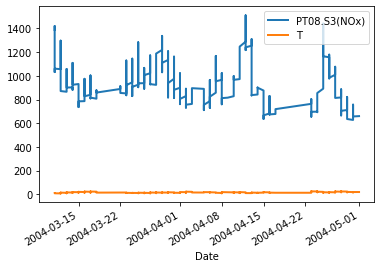

In [132]:
df3 = pd.concat([y.rolling(12).mean(), A.rolling(12).mean()], axis=1)
df3.plot(linewidth=2, fontsize=10)
plt.xlabel('Date', fontsize=10);

In [133]:
df3.head(5)
'''
Above created a new DataFrame that has two columns .used the pd.concat() function, which takes a list of the columns as a first argument
So now, removing the seasonality, see that PT08 gas potentially has some form of seasonality, whereas temperature is constant
'''

'\nAbove created a new DataFrame that has two columns .used the pd.concat() function, which takes a list of the columns as a first argument\nSo now, removing the seasonality, see that PT08 gas potentially has some form of seasonality, whereas temperature is constant\n'

**CORRELATION**

In [134]:
df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.936239,0.887167,0.972660,0.958437,0.951342,-0.823759,0.861432,0.939925,0.882925,0.318282,-0.105163,0.295591
PT08.S1(CO),0.936239,1.000000,0.781711,0.931354,0.936335,0.922886,-0.829570,0.866575,0.944999,0.934994,0.324778,-0.039564,0.406944
NMHC(GT),0.887167,0.781711,1.000000,0.897928,0.875057,0.811182,-0.774244,0.728052,0.848479,0.761893,0.366949,-0.160261,0.282142
C6H6(GT),0.972660,0.931354,0.897928,1.000000,0.984834,0.927304,-0.848885,0.846743,0.960803,0.896963,0.418451,-0.178412,0.313415
PT08.S2(NMHC),0.958437,0.936335,0.875057,0.984834,1.000000,0.926642,-0.910671,0.885013,0.957866,0.909083,0.445608,-0.193328,0.325285
NOx(GT),0.951342,0.922886,0.811182,0.927304,0.926642,1.000000,-0.814350,0.857425,0.912729,0.893365,0.238407,-0.041978,0.270679
PT08.S3(NOx),-0.823759,-0.829570,-0.774244,-0.848885,-0.910671,-0.814350,1.000000,-0.815241,-0.880240,-0.857561,-0.423992,0.096878,-0.463022
NO2(GT),0.861432,0.866575,0.728052,0.846743,0.885013,0.857425,-0.815241,1.000000,0.807779,0.839631,0.406744,-0.223026,0.214559
PT08.S4(NO2),0.939925,0.944999,0.848479,0.960803,0.957866,0.912729,-0.880240,0.807779,1.000000,0.918986,0.343639,0.012416,0.515575
PT08.S5(O3),0.882925,0.934994,0.761893,0.896963,0.909083,0.893365,-0.857561,0.839631,0.918986,1.000000,0.313527,-0.014560,0.440206


In [135]:
df['10-03-2004':'12-03-2004']

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
Date,,,,,,,,,,,,,,,


In [136]:
df[:'11-03-2004']

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
Date,,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3/10/2004 18:00:00
2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3/10/2004 19:00:00
2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,3/10/2004 20:00:00
2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3/10/2004 21:00:00
2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3/10/2004 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-30,20:00:00,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1568.0,19.1,61.1,1.3345,4/30/2004 20:00:00
2004-04-30,21:00:00,3.1,1362.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529,4/30/2004 21:00:00
2004-04-30,22:00:00,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579,4/30/2004 22:00:00


<Figure size 7200x7200 with 0 Axes>

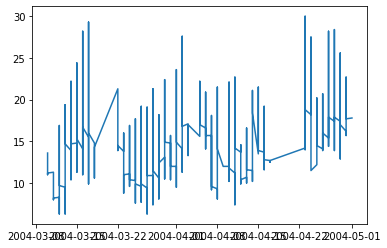

<Figure size 7200x7200 with 0 Axes>

In [137]:
plt.plot(df['T'])
plt.figure(figsize=(100, 100))

In [138]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd =  timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

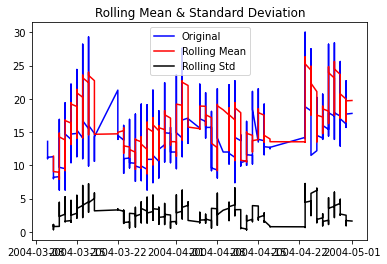

Results of Dickey-Fuller Test:
Test Statistic                  -2.752370
p-value                          0.065406
#Lags Used                      21.000000
Number of Observations Used    805.000000
Critical Value (1%)             -3.438499
Critical Value (5%)             -2.865137
Critical Value (10%)            -2.568685
dtype: float64


In [139]:
test_stationarity(df['T'])

**Estimating & Eliminating Trend**

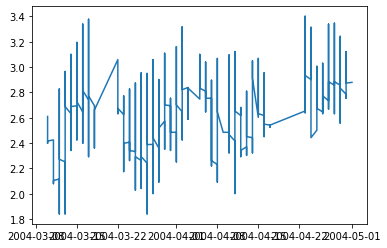

In [140]:
ts_log = np.log(df['T'])
plt.plot(ts_log)

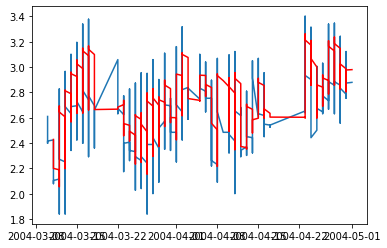

In [141]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [142]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

Date
2004-03-10   NaN
2004-03-10   NaN
2004-03-10   NaN
2004-03-10   NaN
2004-03-10   NaN
2004-03-10   NaN
2004-03-11   NaN
2004-03-11   NaN
2004-03-11   NaN
2004-03-11   NaN
Name: T, dtype: float64

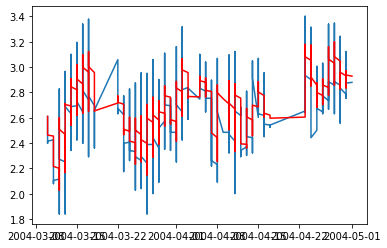

In [143]:
expwighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

**Eliminating Trend and Seasonality**

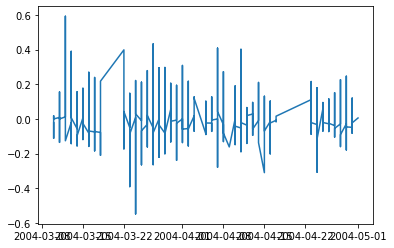

In [144]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

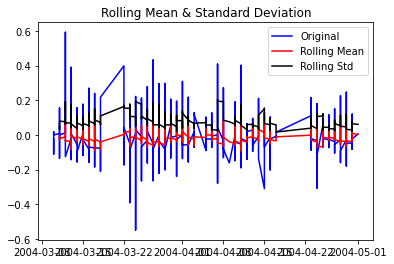

Results of Dickey-Fuller Test:
Test Statistic                -9.925011e+00
p-value                        2.922633e-17
#Lags Used                     2.000000e+01
Number of Observations Used    8.050000e+02
Critical Value (1%)           -3.438499e+00
Critical Value (5%)           -2.865137e+00
Critical Value (10%)          -2.568685e+00
dtype: float64


In [145]:
ts_log_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [146]:
ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
ts_log.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


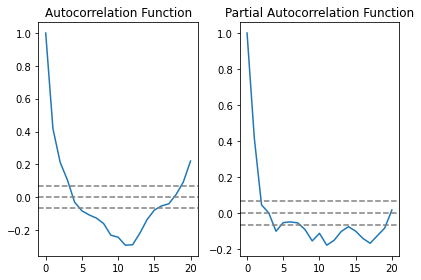

In [147]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 7.0931')

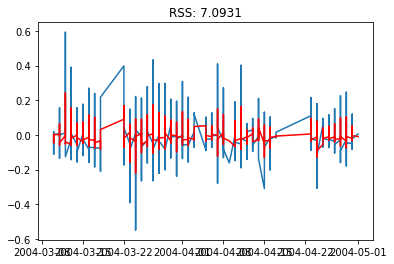

In [148]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 7.1870')

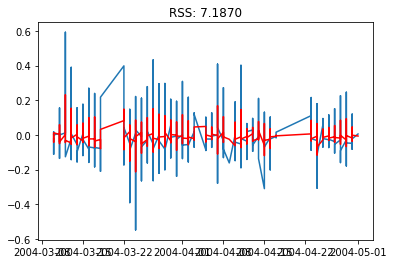

In [149]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overf

Text(0.5, 1.0, 'RSS: 6.2794')

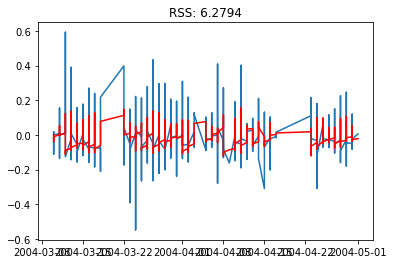

In [150]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [151]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2004-03-10    0.000591
2004-03-10   -0.007087
2004-03-10   -0.034611
2004-03-10   -0.038618
2004-03-10   -0.011063
dtype: float64

In [152]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2004-03-10    0.000591
2004-03-10   -0.006496
2004-03-10   -0.041107
2004-03-10   -0.079725
2004-03-10   -0.090789
dtype: float64

In [153]:
predictions_ARIMA_log = pd.Series(ts_log.index[0], index=ts_log.index)
predictions_ARIMA_log

Date
2004-03-10   2004-03-10
2004-03-10   2004-03-10
2004-03-10   2004-03-10
2004-03-10   2004-03-10
2004-03-10   2004-03-10
                ...    
2004-04-30   2004-03-10
2004-04-30   2004-03-10
2004-04-30   2004-03-10
2004-04-30   2004-03-10
2004-05-01   2004-03-10
Length: 827, dtype: datetime64[ns]

In [154]:
predictions_ARIMA_log.values[1:3]

array(['2004-03-10T00:00:00.000000000', '2004-03-10T00:00:00.000000000'],
      dtype='datetime64[ns]')